<a href="https://colab.research.google.com/github/swethasrihari/privacy-project-team1/blob/main/diffprivGNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
pip install diffprivlib

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from diffprivlib.models import GaussianNB
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
path = '/content/drive/MyDrive/cleanedAdultIncome.csv'
dataset = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Drop columns
columns_to_drop = ['native-country', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
dataset = dataset.drop(columns=columns_to_drop)

# Encode categorical variables using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['workclass', 'race', 'education', 'marital-status',
                                           'occupation', 'relationship', 'gender'])

# Split dataset into features (X) and target variable (y)
X = dataset.drop(columns=['income'])
y = dataset['income']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define bounds for GaussianNB
bounds = (np.min(X_train, axis=0), np.max(X_train, axis=0))

# Define epsilon values (logarithmic)
epsilons = np.logspace(-1, 1, 50)

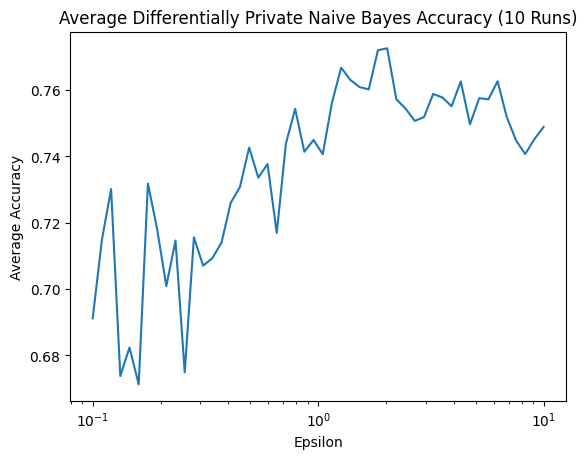

Test accuracy: 0.75


In [21]:
# Define the number of runs
num_runs = 10

# Initialize a list to store accuracy values for each run
all_accuracies = []

# Iterate over each run
for run in range(num_runs):
    # Train and evaluate differentially private Naive Bayes model for each epsilon
    accuracy = []
    for epsilon in epsilons:
        clf = GaussianNB(bounds=bounds, epsilon=epsilon)
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        accuracy.append(acc)

    # Store accuracy values for this run
    all_accuracies.append(accuracy)

# Convert the list of accuracy values to a NumPy array for easier manipulation
all_accuracies = np.array(all_accuracies)

# Calculate the average accuracy for each epsilon value across all runs
average_accuracies = np.mean(all_accuracies, axis=0)

# Plot average accuracy vs. epsilon
plt.semilogx(epsilons, average_accuracies)
plt.title("Average Differentially Private Naive Bayes Accuracy ({} Runs)".format(num_runs))
plt.xlabel("Epsilon")
plt.ylabel("Average Accuracy")
plt.show()
print("Test accuracy: %.2f" % average_accuracies[-1])